In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 2365 to 1399
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 2365 to 1399
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Bebek, Oyuncak
Ev, Pet
Gıda, Şekerleme
Kağıt, Kozmetik
Deterjan, Temizlik
İçecek
Süt, Kahvaltılık
Et, Tavuk, Balık
Meyve, Sebze
Elektronik
Guy
Bugün Eklenenler
Shoulders
Oreal


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
113,i'think,Elektronik,Görüntü Ve Ses Sistemleri,"HDMI, Scart Kablo",NaN,NaN,NaN,NaN,i'think Hdmi To Iph. Görüntü Ve Ses Aktarım Ka...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-hdmi-to-iph-g...
4183,Apple,Elektronik,Telefon Ve Aksesuarları,Telefon,NaN,NaN,NaN,NaN,Iphone 12 Mini 64 Gb Kırmızı Cep Telefonu - Mi...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/iphone-12-mini-64-gb...
4199,DemirDöküm,Elektronik,Beyaz Eşya,NaN,NaN,NaN,NaN,NaN,DemirDöküm Dt4 65 L Termosifon - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/demirdokum-dt4-65-l-...
4055,Xiaomi,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Xiaomi Mi Vacuum-mop 1C Robot Süpürge - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/xiaomi-mi-vacuum-mop...
4056,Aprilla,Elektronik,Elektrikli Ev Aletleri,Kişisel Bakım,Saç Kurutma Makinesi,NaN,NaN,NaN,Aprilla Exclusive Ahd-2127 Saç Kurutma Makines...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/aprilla-exclusive-ah...
2924,Leva,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Işık 100'Lü Yılbaşı Süs - Migros,&lt;p&gt;&lt;strong&gt;Işıklı 100';lü Yılbaşı ...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/isik-100lu-yilbasi-s...
4058,Electrolux,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Electrolux Eufc81db Elektrikli Süpürge - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/electrolux-eufc81db-...
4176,Joysidea,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Joysidea Quartz 1400W Elektrikli Isıtıcı - Migros,&lt;p&gt;1400W&lt;/p&gt;&lt;p&gt;Enerji tasarr...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/joysidea-quartz-1400...
115,i'think,Elektronik,Görüntü Ve Ses Sistemleri,"HDMI, Scart Kablo",NaN,NaN,NaN,NaN,i'think Hdmi To Type-C Görüntü Ses Aktarım Kab...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-hdmi-to-type-...
4191,Canon,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar Aksesuarları,NaN,NaN,NaN,NaN,Canon Pixma G3411 Wifi Tarayıcı Renkli Fotokop...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/canon-pixma-g3411-wi...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Le Petit Marseillais Vanilya 250Ml+Listerine C...,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/duru-detox-dus-jeli-...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Elseve Arginine Direnç X3 Dökülme Karşıtı Şamp...,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/nestle-1927-uzum-fin...
freq,479,3426,1343,254,189,4,2,98,145,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14919 entries, 2365 to 1399
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 14919 non-null  object 
 1   urunKategorileri       14919 non-null  object 
 2   urunKategorileriTwo    14919 non-null  object 
 3   urunKategorileriThree  14479 non-null  object 
 4   urunKategorileriFour   8506 non-null   object 
 5   urunKategorileriFive   4 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                14919 non-null  object 
 9   urunAciklama           12616 non-null  object 
 10  urunFoto               14919 non-null  object 
 11  urunURL                14917 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


### Ürün Açıklama Kolonunu Düzenleyelim

In [18]:
df["urunAciklama"] = df["urunAciklama"].astype(str).apply(remove_html)

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_colwidth',10000)


In [35]:
df.head(200)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
2365,Pilsan,"Bebek, Oyuncak",Oyuncak,Oyuncak Araçlar,Taşıtlar,NaN,NaN,NaN,Pilsan Truva İş Kamyonları - Migros,"Pilsan Truva Kamyon- Kutulu , 3 yaş ve üzerindeki çocukların oynaması için uygun eğlenceli bir oyuncaktır. Çocuklarınız bu geniş kamyonun hareketli damperini oyuncakları ile doldurup park ve bahçede oyun oynarken yanlarında taşıyabilirler.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/36035518/pilsan-truva-kamyon-kutulu-232603.jpg,https://www.migros.com.tr/pilsan-truva-is-kamyonlari-p-225dbbe
170,Body pure,"Ev, Pet",Giyim,İç Giyim,Erkek Patik,NaN,NaN,NaN,Body Pure Erkek Spor Patik Çorap - Migros,"Mağaza stoklarıyla sınırlıdır. Adet fiyatıdır. Tercih ettiğiniz rengi ürün notuna ekleyebilirsiniz. Tercih ettiğiniz renk mağaza stoklarında mevcut ise, tercih ettiğiniz renk teslimi yapılabilecektir. Elyaf Özellikleri:%78 Pamuk,% 20 Polyamid,%2 Elastan Ebat Beden: 40-44 Renk Seçenekleri: Siyah, Antrasit, Lacivert, M.Gri Yıkama Talimatı: 30 Derecede Yıkama Uygundur.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/51077960/51077960-d88a47.jpg,https://www.migros.com.tr/body-pure-erkek-spor-patik-corap-p-30b6348
2457,Boombastic,"Gıda, Şekerleme",Atıştırmalık,Bisküvi,Kremalı Bisküvi,NaN,NaN,NaN,Boombastic Burger Sandviç Bisküvi 120G - Migros,"İşletme Kayıt No TR-27-K-007624 Net Miktar (g/ml) 120 Menşei TÜRKİYE İçindekiler İçindekiler : Sandviç Bisküvi (%58) (Buğday unu (gluten içerir), bitkisel yağ (palm), şeker, glukoz-fruktoz şurubu, kabartıcılar (sodyum bikarbonat, sodyum asit pirofosfat, amonyum bikarbonat), yağlı süt tozu, tuz, emülgatör (ayçiçek lesitini), aroma verici, yumurta akı tozu), Çikolatalı Krema (%25) (Şeker, sütlü çikolata (%20) (Şeker, kakao yağı, peyniraltı suyu tozu (süt ürünü), tam yağlı süt tozu, kakao kitlesi, emülgatör (ayçiçek lesitini), aroma verici), bitkisel yağ (palm), fındık, kakao tozu, yağsız süt tozu, peyniraltı suyu tozu (süt ürünü), kakao yağı, emülgatör (ayçiçek lesitini), tuz, aroma verici), Sütlü Krema (%15) (Şeker, hindistan cevizi yağı, bitkisel yağ (palm), peyniraltı suyu tozu (süt ürünü), yağsız süt tozu (%10), emülgatör (ayçiçek lesitini), aroma verici, renklendirici (beta karoten)), Pirinç Patlağı (%2) (Buğday irmiği (gluten içerir), pirinç unu, şeker, malt özütü (gluten içerir), tuz, emülgatörler (yağ asitlerinin mono ve digliseritleri), kabartıcı (sodyum bikarbonat)). Sütlü çikolata min.%30 kakao kuru maddesi ve min.%14 süt kuru maddesi içermektedir. Alerjen Uyarısı Alerjen Uyarısı: Buğday gluteni, fındık, süt ürünleri ve yumurta içerir. Eser miktarda Antep fıstığı, badem, yer fıstığı, ceviz, vb. tohum, susam, soya lesitini ve/veya ürünleri içerebilir. Saklama Koşulları Serin ve Kuru ortamda muhafaza ediniz Gıda İşletmecisi Üretici İthalatçı Dağıtıcı ŞÖLEN ÇİKOLATA GIDA SAN.VE TİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet sitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/07039597/07039597_yan-df305b.jpg,https://www.migros.com.tr/boombastic-burger-sandvic-biskuvi-120g-p-6b6a6d
702,Just for men,"Kağıt, Kozmetik",Saç Bakım,Saç Boyası,Erkek Saç Boyası,NaN,NaN,NaN,Just For Men Touch Of Grey Saç Boyası Orta 50 G - Migros,"Amerika başta olmak üzere dünyada en çok satan saç boyası olan Just For Men Touch of Grey, amonyak ve peroksit yerine havadaki oksijeni kullanarak saçlarınızdaki tüm beyazları yok etmeden azaltan devrim niteliğinde formül. Sadece beyazlaşmış saç tellerinizi tüm

### En Çok Ürün Hangi Kategoride Bakalım

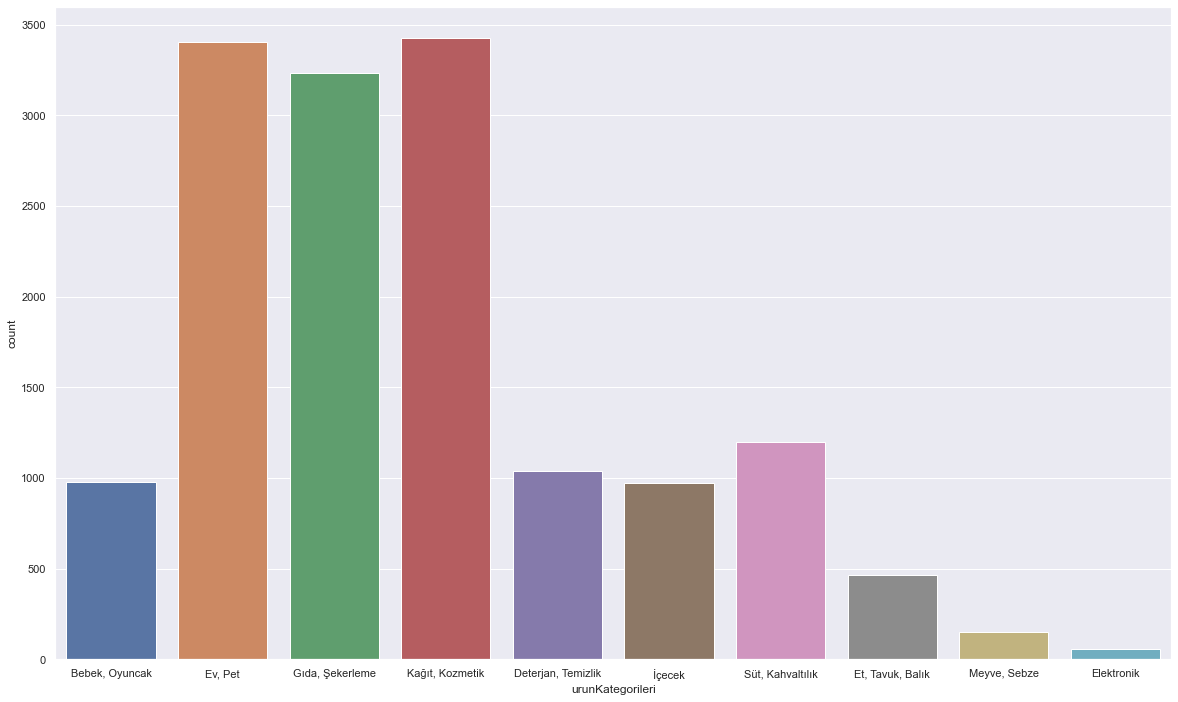

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [23]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

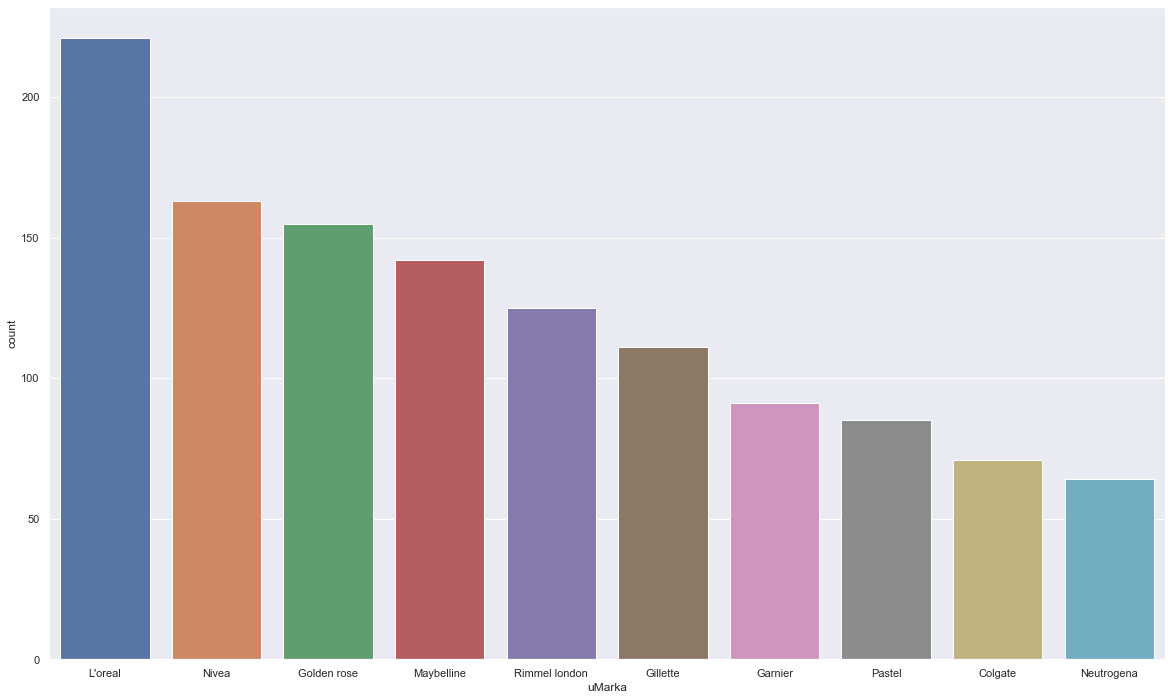

In [24]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [25]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros    2
Kotex İnce Günlük Ped Parfumlu 34'lü - Migros                        1
Pastel Oje 49 - Migros                                               1
Name: urunAdi, dtype: int64

In [26]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [27]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan Saçlar güçlenerek uzar. Saçı koparak dökülmeye karşı korur. Saç kökünü besler, enerji verir. Saçın yeniden yapılandırılmasında rol oynayan en önemli aminoasitlerden biri olan Arginine mikro sirkülasyonu hızlandırarak, saçı kökten uca beslemeye yardımcı olur. Saç Dökülmelerinde Gözle Görülür Azalma Bir müşteri, aynı gün içerisinde, bu üründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255777/34255777_urundetay-b75b44.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a1
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Saçın Yeniden Yapılandırılmasında Rol Oynayan En Önemli Aminoasitlerden Biri Olan Arginine Mikro Sirkülasyonu Hızlandırarak Saçı Kökten Uca Beslemeye Yardımcı Olur. Saç Dökülmelerinde Gözle Görülür Azalma. Saçlar güçlenerek uzar. Saçı dökülmeye karşı korur. Saç kökünü besler, enerji verir. Bir müşteri, aynı gün içerisinde, bu üründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255782/34255782_etiket-cd0481.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a6


In [28]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [29]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [30]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,Güres M - Orta Boy Yumurta 30'lu ( 53 - 62 G) - Migros,"Orvital Organik Yumurta , ailece keyifle tüketebileceğiniz üründür. Hijyenik koşullarda paketlenmiş olan yumurtalar organik hayvancılık esaslarına göre üretilmiştir. Kahvaltıda, çorbalarda, hamur işlerinde kullanabilirsiniz. İşletme Kayıt No TR-55-0166 Kullanım Önerileri SATIN ALDIKTAN SONRA BUZDOLABINDA/SOĞUKTA MUHAFAZA EDİNİZ. Menşei TÜRKİYE İçindekiler ORGANİK YUMURTA Alerjen Uyarısı YUMURTA Saklama Koşulları Serin ve Kuru ortamda muhafaza ediniz Gıda İşletmecisi Üretici İthalatçı Dağıtıcı ORVİTAL ORGANİK GIDA ÜR.VE DAN.SAN.VE TİC.LTD.ŞTİ. Ürün Bilgilerini Kullanma Hakkında İnternet sitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001994/20001994-1e60db.jpg,https://www.migros.com.tr/cp-10lu-m-orta-boy-d-vitaminli-yumurta-53-62-g-p-13134ce
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [31]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1138,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Zarı Tozu Kapsülü 19.5 G - Migros,"İşletme Kayıt No TR-35-K-035184/003901-14,02,2018 Kullanım Önerileri İlaç değildir. Hastalık önlenmesi veya tedavi amacıyla kullanılmaz. Takviye edici gıdalar normal beslenmenin yerine geçmez. Tavsiye edilen günlük dozajı aşmayınız. Çocukların ulaşamayacağı yerde saklayınız. Menşei TÜRKİYE İçindekiler Yumurta kabuğu , YUMURTA ZARI , ZERDEÇAL, ÇÖREKOTU Alerjen Uyarısı yumurta içerir Saklama Koşulları Serin ve Kuru ortamda muhafaza ediniz Gıda İşletmecisi Üretici İthalatçı Dağıtıcı KOR AGRO ORGANİK GIDA İNŞ.ENERJİ SAN.VE TİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet sitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20002000/20002000-7c03b9.jpg,https://www.migros.com.tr/nova-yumurta-zari-tozu-kapsulu-195-g-p-13134d0
1125,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 6'lı M Boy Yumurta (53-62 G) - Migros,"Yumurtacım 6';lı M Boy Yumurta , besleyici yiyeceklerin başında gelen yumurtayı tüm tazeliği ve lezzeti ile sofralarınıza taşır. 6';lı şekilde satılan orta boy yumurtalar, haşlanarak, omlet ya da menemen şeklinde keyifle tüketilebileceği gibi pek çok yemek tarifinin de olmazsa olmazı olur. İşletme Kayıt No TR03-0061 Kullanım Önerileri RAFADAN:3,5 DK ALALOP: 5 DK KATI:10 DK TEFLON TAVADA: 4 DK Menşei TÜRKİYE İçindekiler YUMURTA Saklama Koşulları Serin ve Kuru ortamda muhafaza ediniz Gıda İşletmecisi Üretici İthalatçı Dağıtıcı KUMARTAŞLI GIDA VE NAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma Hakkında İnternet sitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001974/20001974-2d0663.jpg,https://www.migros.com.tr/yumurtacim-6li-m-boy-yumurta-53-62-g-p-13134b6
1134,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 10'lu L Boy Kahverengi Yumurta (63-72G) - Migros,"Yerli Üretim 10';lu Şeffaf Ambalajında A Sınıfı Large Boy Kahverengi Kabuklu Yumurta Pişirme Önerileri: Katı: 10 dakika Orta Katı: 5 dakika Rafadan: 3,5 dakika Teflon tavada: Orta ateşte 4 dakika Satın aldıktan sonra buzdolabında soğukta muhafaza ediniz. Son kontrolleri yapıldıktan sonra el değmeden özenle paketlenen ürünlerimiz işletme çıkışında tüketicilerimize ulaşana kadar geçen sürede hasar görebilir. Kırık yumurta tespit ederseniz kırılan yumurtaları tüketmeyiniz. İşletme Kayıt No TR 03-0061 Menşei TÜRKİYE İçindekiler yumurta Saklama Koşulları Serin ve Kuru ortamda muhafaza ediniz Gıda İşletmecisi Üretici İthalatçı Dağıtıcı KUMARTAŞLI GIDA VE NAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma Hakkında İnternet sitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001994/20001994-1e60db.jpg,https://www.migros.com.tr/yumurtacim-10lu-l-b

In [32]:
from to_chart import *

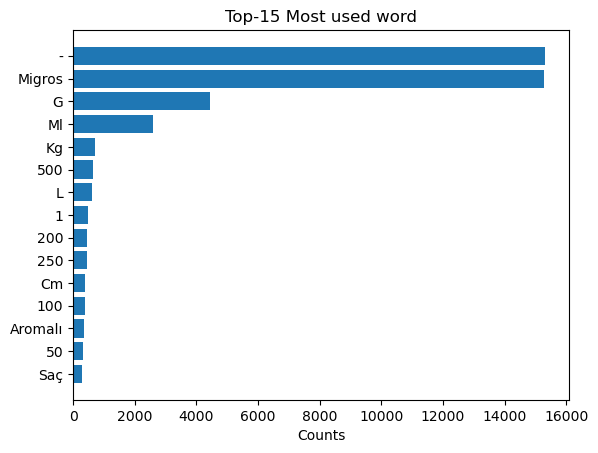

In [33]:
most_15_words(df["urunAdi"])